# multiple regression ex 1000 comapanies

# importing libraries

In [1]:
!pip install --upgrade inline

In [2]:
# importing of  the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print("All libraries loading")

All libraries loading


# load dataset

In [3]:
companies = pd.read_csv('companies.csv')


In [4]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
companies.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000
999,161181.72,270939.860,295442.1700,New York,476485.43000


In [6]:
x = companies.iloc[:, 0:4]
y = companies.iloc[:, 4]

#asssigning last column to be y and the rest are the predictor vaariables

In [7]:
companies.isnull

<bound method DataFrame.isnull of      R&D Spend  Administration  Marketing Spend       State        Profit
0    165349.20      136897.800      471784.1000    New York  192261.83000
1    162597.70      151377.590      443898.5300  California  191792.06000
2    153441.51      101145.550      407934.5400     Florida  191050.39000
3    144372.41      118671.850      383199.6200    New York  182901.99000
4    142107.34       91391.770      366168.4200     Florida  166187.94000
..         ...             ...              ...         ...           ...
995   54135.00      118451.999      173232.6695  California   95279.96251
996  134970.00      130390.080      329204.0228  California  164336.60550
997  100275.47      241926.310      227142.8200  California  413956.48000
998  128456.23      321652.140      281692.3200  California  333962.19000
999  161181.72      270939.860      295442.1700    New York  476485.43000

[1000 rows x 5 columns]>

In [8]:
companies.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
companies.desrcibe()

AttributeError: 'DataFrame' object has no attribute 'desrcibe'

In [10]:
companies.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


In [11]:
companies.cov()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,2.165745e+09,3.419012e+08,4.169808e+09,1.886646e+09
Administration,3.419012e+08,1.591112e+08,6.012219e+08,4.011797e+08
Marketing Spend,4.169808e+09,6.012219e+08,8.386602e+09,3.602737e+09
Profit,1.886646e+09,4.011797e+08,3.602737e+09,1.839435e+09


In [12]:
def drop_outliers(train,columns):
    iqr=1.5*(np.percentile(train[columns],75) - np.percentile(companies[columns],25))
    companies.drop(companies[companies[columns]>(iqr+np.percentile(companies[columns],75))].index,inplace=True)
    companies.drop(companies[companies[columns]<(np.percentile(companies[columns],25)-iqr)].index,inplace=True)
drop_outliers(companies,"Profit")


<AxesSubplot:xlabel='Profit'>

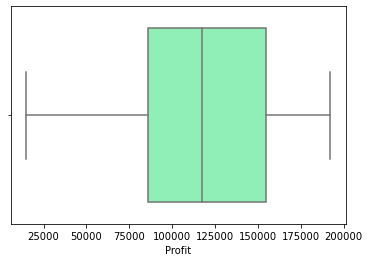

In [13]:
sns.boxplot(x="Profit",data=companies,palette='rainbow')

<AxesSubplot:xlabel='Administration'>

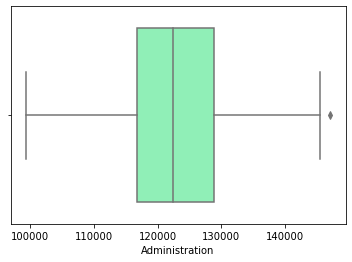

In [14]:
drop_outliers(companies,"Administration")
sns.boxplot(x="Administration",data=companies,palette='rainbow')

<AxesSubplot:>

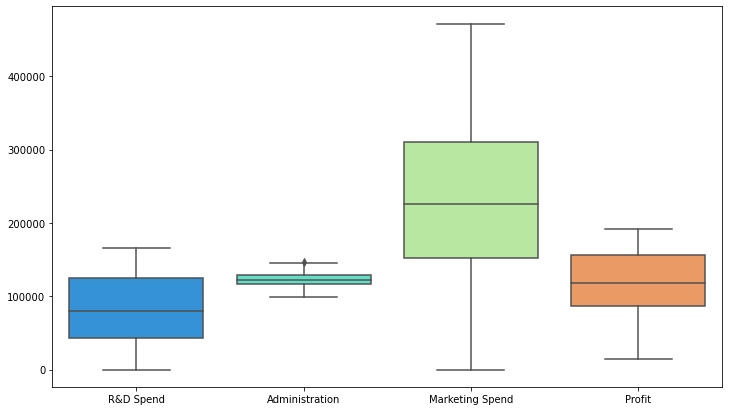

In [15]:
plt.figure(figsize=(12,7))
sns.boxplot(data=companies,palette='rainbow')

In [16]:
X=companies.drop(['Profit'],axis=1)
Y=companies['Profit']

In [17]:
from sklearn.model_selection import train_test_split
train_set_x,test_set_x,train_set_y,test_set_y=train_test_split(X,Y,test_size=0.3,random_state=2)

In [18]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(train_set_x,train_set_y)

ValueError: could not convert string to float: 'California'

In [20]:
 from sklearn import linear_model
    regr=linear_model.LinearRegression()
    regr.fit(train_set_x,train_set_y)
